In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

In [2]:
# sample data
image = mpimg.imread('test_images/solidYellowCurve2.jpg')

In [3]:
image_copy = np.copy(image)

In [4]:
image_gray_scaled = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

In [5]:
image_gray_blurred = cv2.GaussianBlur(image_gray_scaled, (3,3),0)

In [6]:
edges = cv2.Canny(image_gray_blurred, 10,140)

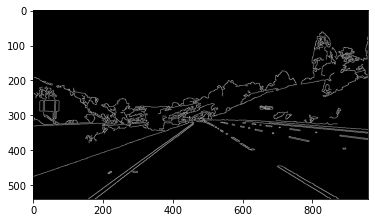

In [7]:
plt.imshow(edges, cmap='gray')

In [8]:
boundary = np.array([[(110,539),(860,539),(500,305)]])

In [9]:
mask = np.zeros_like(edges)

In [10]:
cv2.fillPoly(mask, boundary, 255)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
sample = cv2.bitwise_and(mask, edges)

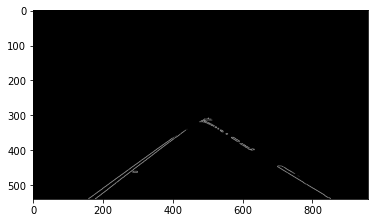

In [12]:
plt.imshow(sample, cmap='gray')

In [13]:
rho = 2
theta = np.pi/180 
threshold = 40
min_line_length = 100
max_line_gap = 0
line_image = np.zeros_like(edges)

In [14]:
lines = cv2.HoughLinesP(sample, rho, theta, threshold, min_line_length, max_line_gap)

In [15]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

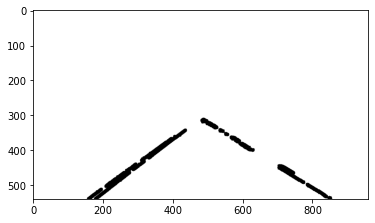

In [16]:
plt.imshow(line_image, cmap='gray_r')